# A2: Floating-point numbers, conditioning, and order of convergence

In [1]:
using Plots
using LaTeXStrings
using PrettyTables

## A. Floating-point numbers

In this section (and for the rest of the course), we will use ``Float64``. Let $\epsilon$ be the machine precision in this case:

In [2]:
ϵ = eps( Float64 )

2.220446049250313e-16

Here, ``eps( FloatN )`` with $N=16, 32,$ and $64$ gives the machine precision in half, single, and double precision with the default being ``Float64``. That is, ``eps() = eps( Float64 )``.

**[15 pts]** Note: use the value of $\epsilon$ as defined above.
1. What is $\textrm{fl}( 1 + \epsilon/2 )$ in Julia?  
2. Explain why ``(1.0 + ϵ/2) - 1.0``  is **not** the same as ``1.0 + (ϵ/2 - 1.0)`` in ``Float64``.  

*Solution.* The smallest floating point number larger than ``1.0`` is ``1.0 + ϵ``. Julia rounds  ``1.0 + ϵ/2`` to ``1.0``:

In [3]:
1 + ϵ/2

1.0

Floating point numbers are of the form $ \pm (1 + f) \cdot 2^n$ where $f$ is written in binary with $k$ bits ($k=52$ for double precision). There are therefore $2^k$ floats in the intervals $[2^n, 2^{n+1})$ and $(-2^{n+1}, -2^{n}]$ spaced apart by $2^{n-k}$. As a result, $\epsilon/2 -1 \in (-1, -2^{-1}]$ is a floating point number and ``1.0 + (ϵ/2 - 1.0) = ϵ/2`` which is not zero but ``(1.0 + ϵ/2) - 1.0`` is $\text{fl}(1 + ϵ/2) - 1.0 = 1.0 - 1.0 = 0.0$.

In [4]:
@show (1.0 + ϵ/2) - 1.0 ;
@show 1.0 + (ϵ/2 - 1.0) ;

@show log2( ϵ );

(1.0 + ϵ / 2) - 1.0 = 0.0
1.0 + (ϵ / 2 - 1.0) = 1.1102230246251565e-16
log2(ϵ) = -52.0


## B. Conditioning

**[10 pts]**  For fixed $f$, define

\begin{align}
    g(x) &= f(x - a), \\ 
    h(x) &= b f(x), \\ 
    j(x) &= f(c x), 
\end{align}

1. What is $\kappa_g(x)$?

<div class='alert alert-block alert-success'><b>Answer.</b> 

\begin{align}
    \kappa_g(x) &= \left| \frac{x g'(x)}{g(x)} \right| = \left| \frac{x f'(x-a)}{f(x-a)} \right|
\end{align}

 </div> 

2. Write $\kappa_{h}(x)$ in terms of $\kappa_f$?

<div class='alert alert-block alert-success'><b>Answer.</b> 

\begin{align}
    \kappa_h(x) &= \left| \frac{x h'(x)}{h(x)} \right| = \kappa_f(x)
\end{align}

 </div> 

3. Write $\kappa_{j}(x)$ in terms of $\kappa_f$?

<div class='alert alert-block alert-success'><b>Answer.</b> 

\begin{align}
    \kappa_j(x) &= \left| \frac{x j'(x)}{j(x)} \right| = \left| \frac{x c f'(cx)}{f(cx)} \right| = \kappa_f(cx)
\end{align}

Common error: $|c|\kappa_f(cx)$, or $\frac1{|c|} \kappa_f(x)$, or $\frac1{|c|} \kappa_f( c x)$ 

 </div> 


4. What is $\kappa_f(x)$ when $f(x) = e^{-x^2}$?

<div class='alert alert-block alert-success'><b>Answer.</b> 

\begin{align}
    \kappa_f(x) &= \left| \frac{x e^{-x^2}(-2x)}{e^{-x^2}} \right| = 2x^2
\end{align}

 </div> 

**[25 pts]**  Consider the differential equation (initial value problem)

\begin{align}
\begin{split}
    u'(x) &= u(x) +e^{-x} \nonumber \\
    u(0) &= -\frac12 .
\end{split}\tag{$\star$}
\end{align}

1. Show that $u(x) = -\frac12 e^{-x}$ solves $(\star)$

<div class='alert alert-block alert-success'><b>Answer.</b> 

Here, $u'(x) = \frac12 e^{-x} = -\frac12 e^{-x} + e^{-x} = u(x) + e^{-x}$. Moreover, $u(0) = -\frac12 e^0 = -\frac12$.  

</div> 

Now we perturb the initial data, by considering 

\begin{align}
\begin{split}
    u'(x) &= u(x) +e^{-x} \nonumber \\
    u(0) &= \alpha
\end{split}\tag{$\star\star$}
\end{align}

for $\alpha := \epsilon - \frac12$.  

2. Show that $u_{\alpha}(x) = (\alpha + \frac12) e^x -\frac12 e^{-x} $ solves $(\star\star)$.

<div class='alert alert-block alert-success'><b>Answer.</b> 

We have $u'_\alpha(x) = (\alpha+\frac12) e^{x} + \frac12 e^{-x}= u_\alpha(x) + e^{-x}$. Moreover, $u_\alpha(0) = (\alpha + \frac12) e^0 - \frac12 e^0 = \alpha$.  

 </div> 

3. Plot the functions $u$ and $u_{\alpha}$ and comment on the difference between the solutions for large $x$.
 



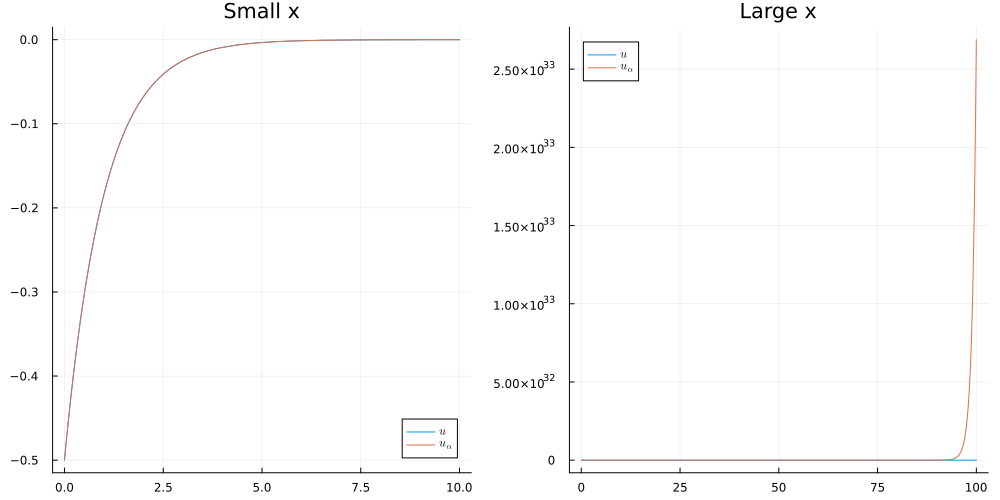

In [17]:
α = 1e-10 - 1/2;

u = x -> -exp(-x)/2;
uα = x -> (α + 1/2)*exp(x) + u(x);

plt1 = plot([u, uα], 0, 10, label=[L"u" L"u_\alpha"], title="Small x")
plt2 = plot([u, uα], 0, 100, label=[L"u" L"u_\alpha"], title="Large x")

plot( plt1, plt2, size=(1000,500))

<div class='alert alert-block alert-success'>

As you can see from the graphs, we have $u(x) \approx u_\alpha(x)$ for small $x$. For larger $x$, the difference in the solutions diverges exponentially, which can also be seen in the following plot: 

</div> 

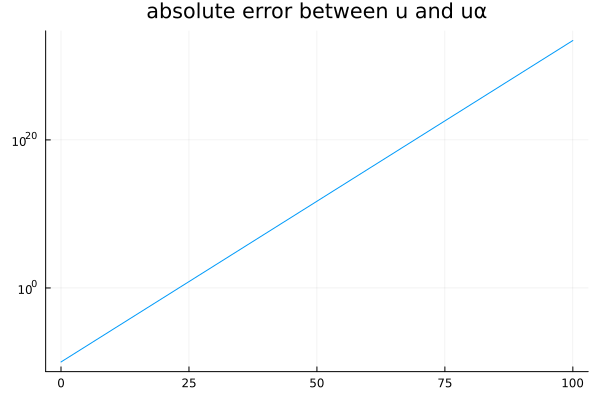

In [20]:
err = x -> abs( u(x) - uα(x) ) 

plot( err, 0, 100 , yaxis=:log, legend = false, title="absolute error between u and uα" )

4. Let $f( \alpha ) = u_\alpha( 100 )$. What is the condition number $\kappa_f( \alpha )$? 


<div class='alert alert-block alert-success'><b>Answer.</b> 

Notice that $f(\alpha) = (\alpha + \frac12) e^{100} -\frac12 e^{-100}$ and so the condition number is given as 

\begin{align}
    \kappa_f(\alpha) &= \left| \frac{\alpha f'(\alpha)}{f(\alpha)} \right| \nonumber\\
    &= \left| \frac{\alpha e^{100}}{(\alpha + \frac12) e^{100} -\frac12 e^{-100}} \right| 
\end{align}

</div> 

5. Explain what happens for $\alpha \approx -\frac12$. Link your observations to your answer for question 3. 

<div class='alert alert-block alert-success'><b>Answer.</b> 

When $\alpha \approx -\frac12$, the condition number is very large: we have

\begin{align}
    \lim_{\alpha \to -\frac12} \kappa_f(\alpha) &= 
    %
    \left| \frac{-\frac12 e^{100}}{0 -\frac12 e^{-100}} \right| = e^{200} \approx 7 \times 10^{86}.
\end{align}

When $\alpha \approx -\frac12$, a small relative error in the input leads to a very large relative error in $u_{\alpha}(100)$, as can be seen in the graphs for question 3. That is, if we are trying to approximate $u(100)$ with $u_{\alpha}(100)$, then  

\begin{align}
    \left|\frac{u(100) - u_{\alpha}(100)}{u(100)}\right| \approx k_{f}(\alpha) \left|\frac{-\frac12 - \alpha}{-\frac12}\right|.
\end{align}

For my choice of $\alpha$, the left hand side is approximately $1.5 \times 10^{77}$ and $\left|\frac{-\frac12 - \alpha}{-\frac12}\right| \approx 2\times 10^{-10}$ and so $\kappa_f(\alpha) \approx 7\times 10^{86}$ as expected.

</div> 

In [30]:
rel_err_out = abs( (u(100) - uα(100))/u(100) ) 
rel_err_in = abs( (-1/2-α)/(-1/2) )

( rel_err_out , rel_err_in, rel_err_out/rel_err_in )

(1.4451948732011001e77, 2.000000165480742e-10, 7.22597376812575e86)

**[15 pts]** Let $x_{\pm}(\epsilon)$ be the roots of $x^2 - (2 + \epsilon)x + 1$.  
1. Show that $x_{\pm}(\epsilon) \to 1$ as $\epsilon \to 0$,

<div class='alert alert-block alert-success'><b>Answer.</b> 

The roots are given by 

\begin{align}
    x_{\pm}(\epsilon) &= \frac12 \left( 2 + \epsilon \pm \sqrt{ (2+\epsilon)^2 - 4  } \right) \nonumber\\
    %
    &= \frac12 \left( 2 + \epsilon \pm \sqrt{\epsilon} \sqrt{ \epsilon + 4 } \right)
\end{align}

As $\epsilon \to 0$, we have $x_{\pm}(\epsilon) \to \frac12 \left( 2  \right) = 1$.

</div> 

2. Print the quantities $\frac{|x_{\pm}(\epsilon) - 1|}{\sqrt{\epsilon}}$ for different small $\epsilon$,

<div class='alert alert-block alert-success'><b>Answer.</b> 

These quantities are bounded and converge to $1$ as $\epsilon \to 0$:
 </div> 

In [17]:
ϵ = 10.0.^(0:-1:-11)
xplus = t ->  (2 + t + sqrt( (2 + t)^2 - 4 ) )/2
xminus = t ->  (2 + t - sqrt( (2 + t)^2 - 4 ) )/2

@pt :header=[ "ϵ", "|x₊(ϵ) - 1|/√ϵ", "|x₋(ϵ) - 1|/√ϵ" ] [ϵ (@.abs( xplus(ϵ)-1 )/sqrt(ϵ)) (@.abs( xminus(ϵ)-1 )/sqrt(ϵ))]

┌─────────┬────────────────┬────────────────┐
│       ϵ │ |x₊(ϵ) - 1|/√ϵ │ |x₋(ϵ) - 1|/√ϵ │
├─────────┼────────────────┼────────────────┤
│     1.0 │        1.61803 │       0.618034 │
│     0.1 │        1.17054 │       0.854309 │
│    0.01 │        1.05125 │       0.951249 │
│   0.001 │        1.01594 │       0.984314 │
│  0.0001 │        1.00501 │       0.995012 │
│  1.0e-5 │        1.00158 │        0.99842 │
│  1.0e-6 │         1.0005 │         0.9995 │
│  1.0e-7 │        1.00016 │       0.999842 │
│  1.0e-8 │        1.00005 │        0.99995 │
│  1.0e-9 │        1.00002 │       0.999984 │
│ 1.0e-10 │        1.00001 │       0.999995 │
│ 1.0e-11 │            1.0 │       0.999998 │
└─────────┴────────────────┴────────────────┘


3. Explain why your answer to question 2 means that the relative condition number $\kappa_{x_\pm}$ is unbounded near $0$.

<div class='alert alert-block alert-success'>
<b><i>This was unclear:</i></b> 

I meant the relative condition number when approximating roots of $x^2 - 2x + 1$ by roots of $x^2 - (2 + \epsilon) x + 1$ as a function of the coefficient in front of $x$ (in practice you might want roots of $p(x) = x^2 - 2x + 1$ but only have an approximation $\widetilde{p}(x) = x^2 - (2 + \epsilon) x + 1$).

The relative condition number is 

\begin{align}
    \kappa \approx \left|\frac
        {\frac
            {x_{\pm}(\epsilon) - 1}
            {1}
        }
        {\frac
            {(2+\epsilon) - 2}
            {2}}\right|
        %
        = \frac
        {2}
        {\sqrt{\epsilon}}
       \left| \frac
            {x_{\pm}(\epsilon) - 1}
            {\sqrt{\epsilon}}\right| \to + \infty
\end{align} 

as $\epsilon \to 0$.

</div> 

**[10 pts]** Let $p_{\alpha}(x) = \alpha x^n + \sum_{j=0}^{n-1} a_{j} x^j$ be a polynomial of degree $n$ and let $r(\alpha)$ be a root of $p_{\alpha}$. What is the condition number $\kappa_r(\alpha)$? 

<div class='alert alert-block alert-success'><b>Answer.</b> 

Notice that $p_\alpha( r(\alpha) ) = 0$. Taking a derivative of this equation gives 

\begin{align}
    r(\alpha)^n + p_\alpha'( r(\alpha) ) r'(\alpha) = 0 \nonumber
\end{align} 

and so

\begin{align}
    r'(\alpha) = - \frac{r(\alpha)^n}{ p_\alpha'( r(\alpha) ) } \nonumber
\end{align}

and 

\begin{align}
    \kappa_{r}(\alpha) &= \left| \frac{\alpha }{ r(\alpha) } \frac{r(\alpha)^n}{ p_\alpha'( r(\alpha) ) } \right| \nonumber\\ 
    %
    &= \left| \frac{\alpha r(\alpha)^{n-1}}{ p_\alpha'( r(\alpha) ) } \right|. \nonumber
 \end{align}

</div> 

## C. Order of convergence

**[25 pts]**   
Fix $a, x_1 > 0$ and define the iteration $x_{n+1} = \frac{1}{2}\big( x_n + \frac{a}{x_n} \big)$.  
1. ✍ Show that $x_{n+1}$ has the same sign as $x_n$, 

<div class='alert alert-block alert-success'><b>Answer.</b> 

Note $\frac12 x_n$ and $\frac1{2 x_n}$ have the same sign as $x_n$. Moreover, since $a> 0$, $\frac{a}{x_n}$ has the same sign as $x_n$. As a result $x_{n+1}$ has the same sign as $x_n$. Since $x_1 > 0$, we find that $x_n > 0$ for all $n$.

</div> 

2. ✍ Suppose that $(x_n) \to \xi$. What is the value of $\xi$?  

<div class='alert alert-block alert-success'><b>Answer.</b> 

Since $g(x) := \frac12\big( x + \frac{a}{x} \big)$ is continuous on $(0,\infty)$ and $(x_n)\to\xi$, we have $\xi = g(\xi)$. Therefore, we have $\frac12\xi = \frac12 \frac{a}{\xi}$ and so $\xi^2 = a$. Since $\xi > 0$ since $x_n > 0$ for all $n$, we have $\xi = + \sqrt{a}$. 

</div> 

3. 💻 Let $x$ be as in question 2. Show numerically that $(x_n) \to \xi$ for a few different choices of $a$ and $x_1$,  

In [36]:
function simple_iteration( g, x1; N=100, tol=1e-10 )
    x = [ x1 ]
    for n in 2:N
        push!( x, g(x[n-1]) )
        if (abs(g(x[end]) - x[end]) < tol)
            break
        end
    end
    return x
end

A = [2, 4, 9, 81]
X = [1., 2., 1e-2]
for a in A
    for x1 in X 
        g = x -> (1/2) * (x + a/x)
        println( "(a, x1) = (", a, ", ", x1, ")" )
        display( simple_iteration( g, x1 ) )
    end
end


(a, x1) = (2, 1.0)


5-element Vector{Float64}:
 1.0
 1.5
 1.4166666666666665
 1.4142156862745097
 1.4142135623746899

(a, x1) = (2, 2.0)


5-element Vector{Float64}:
 2.0
 1.5
 1.4166666666666665
 1.4142156862745097
 1.4142135623746899

(a, x1) = (2, 0.01)


12-element Vector{Float64}:
   0.01
 100.005
  50.012499500024994
  25.026244751462073
  12.553080428164835
   6.356201935818569
   3.3354276246293586
   1.9675254444471926
   1.4920153615082516
   1.4162420669397466
   1.4142150151017185
   1.4142135623738412

(a, x1) = (4, 1.0)


6-element Vector{Float64}:
 1.0
 2.5
 2.05
 2.000609756097561
 2.0000000929222947
 2.000000000000002

(a, x1) = (4, 2.0)


2-element Vector{Float64}:
 2.0
 2.0

(a, x1) = (4, 0.01)


13-element Vector{Float64}:
   0.01
 200.005
 100.01249975000624
  50.02624737536557
  25.053102700799506
  12.606381781938925
   6.461840695060387
   3.5404296799915858
   2.3351180242908565
   2.0240467695928803
   2.0001428443098597
   2.00000000510076
   2.0

(a, x1) = (9, 1.0)


7-element Vector{Float64}:
 1.0
 5.0
 3.4
 3.023529411764706
 3.00009155413138
 3.000000001396984
 3.0

(a, x1) = (9, 2.0)


5-element Vector{Float64}:
 2.0
 3.25
 3.0096153846153846
 3.000015360039322
 3.0000000000393214

(a, x1) = (9, 0.01)


13-element Vector{Float64}:
   0.01
 450.005
 225.01249988889012
 112.52624883340555
  56.3031150859613
  28.231482072789163
  14.275137556506337
   7.45280216792716
   4.330200822451953
   3.2043131832220566
   3.0065137011352236
   3.000007056063384
   3.0000000000082983

(a, x1) = (81, 1.0)


8-element Vector{Float64}:
  1.0
 41.0
 21.48780487804878
 12.628692450375128
  9.521329066772005
  9.014272376994608
  9.000011298790216
  9.000000000007091

(a, x1) = (81, 2.0)


7-element Vector{Float64}:
  2.0
 21.25
 12.530882352941177
  9.497456198181656
  9.01302783945225
  9.000009415515176
  9.000000000004924

(a, x1) = (81, 0.01)


15-element Vector{Float64}:
    0.01
 4050.005
 2025.0124999876543
 1012.5262498703713
  506.3031238981806
  253.23155355508354
  126.77570945351135
   63.707316555639004
   32.489378037960854
   17.491250278253517
   11.061068538296041
    9.192025006663966
    9.002005738841962
    9.000000223449552
    9.000000000000004

<div class='alert alert-block alert-success'><b>Answer.</b> 

This method converges to $\sqrt{a}$ for all choices of $a$ and $x_1$.

</div> 

4. 💻 This iteration can be seen as a way of approximating $\xi$. What is the correseponding order of convergence?

In [45]:
function μ( x, ξ; α=1 )
    return @. abs( x[2:end] - ξ ) / ( abs(x[1:end-1] - ξ )^α );
end 

x = simple_iteration(g, 1.)

println( "μ when α = 1: " )
display( μ( x, 9.0 ) ) 
println("this sequence goes to zero so the convergence is superlinear")

println("---")

println( "μ when α = 2: " )
display( μ( x, 9.0; α=2) ) 
println("this seems to converge to a positive number so the convergence is quadratic")

μ when α = 1: 


7-element Vector{Float64}:
 4.0
 0.3902439024390244
 0.2905788876276958
 0.14366857315728435
 0.027376906265711536
 0.0007916544119173916
 6.276084755195401e-7

this sequence goes to zero so the convergence is superlinear
---
μ when α = 2: 


7-element Vector{Float64}:
 0.5
 0.012195121951219513
 0.023269012485811577
 0.03959238076030172
 0.05251367708158965
 0.055467593955545784
 0.0555465198931192

this seems to converge to a positive number so the convergence is quadratic


<div class='alert alert-block alert-success'> 

In fact, in the latest lecture, we showed that the convergence is quadratic and $\mu = \frac12 \left| \frac{f''(\xi)}{f'(\xi)}\right|$. In this case we have $f(x) = x^2 - a$, $f'(x) = 2x$, and $f'' = 2$ and so $\mu = \frac12 \frac{ 2}{2\sqrt{a}} = \frac1{2\sqrt{a}}$. In the last example above, we have $a=81$ and so we should have $\mu = \frac{1}{18} = 0.0555555555...$. 

 </div> 